In [1]:
from matplotlib import pyplot as plt
from whar_datasets.adapters.pytorch import PytorchAdapter
from whar_datasets.support.getter import WHARDatasetID, get_whar_cfg

In [2]:
cfg = get_whar_cfg(WHARDatasetID.WISDM_12)
dataset = PytorchAdapter(cfg, override_cache=True)

Overriding cache...
Creating config hash...
Checking windowing...
Loading config hash...
Config hash mismatch.
Checking download...
Download is up-to-date.
Checking common format...


Checking sessions: 100%|██████████| 403/403 [00:00<00:00, 1102.51it/s]


Common format is up-to-date.
Parsing...


Caching sessions: 100%|██████████| 403/403 [00:00<00:00, 1132.42it/s]


Checking common format...


Checking sessions: 100%|██████████| 403/403 [00:00<00:00, 1268.69it/s]

Common format is up-to-date.
Selecting activities...
[                                        ] | 0% Completed | 80.29 us

[########################################] | 100% Completed | 9.03 sms


Caching windows: 100%|██████████| 22275/22275 [00:08<00:00, 2630.50it/s]

subject_ids: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]
activity_ids: [0 1 2 3 4 5]


In [3]:
train_loader, val_loader, test_loader = dataset.get_dataloaders(train_batch_size=32)

Getting normalization parameters...
train: 16554 | val: 3256 | test: 2465


In [4]:
weights = dataset.get_class_weights(train_loader)
print(weights)

{1: 0.2467944174849767, 0: 0.2960180446952314, 2: 0.7366566928143873, 3: 0.9324020902268418, 4: 1.5803094987961728, 5: 2.20781925598239}


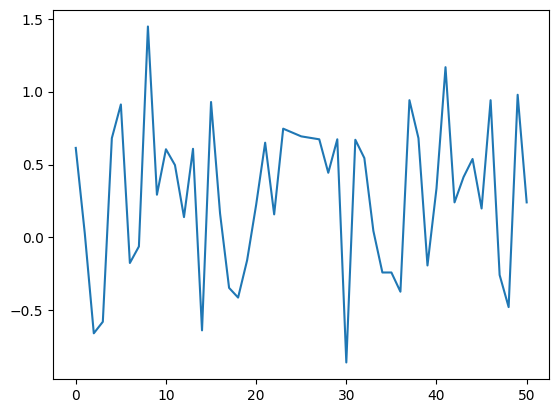

In [13]:
y, x = next(iter(train_loader))

plt.plot(x[0, :, 0])
plt.show()